In [100]:
pip install mpld3

    100% |████████████████████████████████| 890kB 1.6MB/s ta 0:00:011
  Running setup.py bdist_wheel for mpld3 ... done
  Stored in directory: /Users/ruyinzhang/Library/Caches/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install folium 

    100% |████████████████████████████████| 102kB 3.7MB/s a 0:00:011
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt,mpld3
%matplotlib inline 

from shapely.geometry import Polygon,mapping 
import geopandas as gpd
import folium 

In [3]:
us_shape = gpd.read_file('States 21basic/geo_export_5a3c36b9-5725-48f7-932f-b261016d93ea.shp')
us_shape = us_shape[['state_name','geometry']]
us_shape.head()

,state_name,geometry
0,Hawaii,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [4]:
#plot the shape file with folium 
m = folium.Map(location=[50.77500, -100],zoom_start=3) 
choropleth =folium.GeoJson(data= us_shape.to_json())
m.add_child(choropleth)

In [5]:
#Get election data
election = pd.read_csv("election_by_state.csv" )


In [6]:
# Transform election data 
states = set(election['state'])
result = {}
for state in states:
    dem = election[(election.Year == 2016) & (election.state == state)]['dem_votes'].values[0]
    rep = election[(election.Year == 2016) & (election.state == state)]['rep_votes'].values[0]
    #print(state,dem)
    result[state] = {'dem':dem, 'rep':rep}

In [7]:
result

{'Missouri': {'dem': 1054889, 'rep': 1585753},
 'Florida': {'dem': 4485745, 'rep': 4605515},
 'Nevada': {'dem': 537753, 'rep': 511319},
 'Alaska': {'dem': 93007, 'rep': 130415},
 'Washington': {'dem': 1610524, 'rep': 1129120},
 'Montana': {'dem': 174521, 'rep': 274120},
 'Ohio': {'dem': 2317001, 'rep': 2771984},
 'Maryland': {'dem': 1497951, 'rep': 873646},
 'Louisiana': {'dem': 779535, 'rep': 1178004},
 'Arkansas': {'dem': 378729, 'rep': 677904},
 'Pennsylvania': {'dem': 2844705, 'rep': 2912941},
 'Kentucky': {'dem': 628834, 'rep': 1202942},
 'Connecticut': {'dem': 884432, 'rep': 668266},
 'North Dakota': {'dem': 93526, 'rep': 216133},
 'Alabama': {'dem': 718084, 'rep': 1306925},
 'Michigan': {'dem': 2268193, 'rep': 2279805},
 'Nebraska': {'dem': 273858, 'rep': 485819},
 'Minnesota': {'dem': 1366676, 'rep': 1322891},
 'West Virginia': {'dem': 187457, 'rep': 486198},
 'South Dakota': {'dem': 117442, 'rep': 227701},
 'Wisconsin': {'dem': 1382210, 'rep': 1409467},
 'New Hampshire': {'dem

In [8]:
def state_style(state,function=False):
    """
    Returns the style for a state in a given year
    """
    
    state_results = result[state]
    
    #Set state colour
    if state_results['dem'] >= state_results['rep']:
        color = '#4f7bff' #blue
    else:
        color = '#ff5b4f' #red
    
    #Set state style
    if function == False:
        # Format for style_dictionary
        state_style = {
            'opacity': 1,
            'color': color,
        } 
    else:
        # Format for style_function
        state_style = {
             'fillOpacity': 1,
             'weight': 1,
             'fillColor': color,
             'color': '#000000'}    

    return state_style

In [9]:
def style_function(feature):
    """
    style_function used by the GeoJson folium function
    """

    state = feature['properties']['state_name']
    style = state_style(state,function=True)
    
    return style

In [10]:
#plot the choropleth 
m = folium.Map(location=[50.77500, -100],zoom_start=3)
choropleth =folium.GeoJson(data= us_shape.to_json(),style_function=style_function)
m.add_child(choropleth)

In [23]:
#Get COVID data
cases = pd.read_csv("COVID_Cases.csv" )
unemployment_rate = pd.read_csv("State_Unemployment_Rate.csv")
#cases.head()
unemployment_rate.head()
#unemployment_rate = unemployment_rate.rename(columns={'Month': 'month'})
unemployment_rate.columns

Index(['State', 'Month', 'Quarter', 'Unemploy_rate ', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [29]:
# Transform election data 
states = set(cases['state'])
months = set(cases['month'])

results1 = {}
for state in states:
    
    result1 = {}
    for month in months:
        positive = cases[(cases.month == month) & (cases.state == state)]['positive'].values
        if(positive.size == 0):
            pos = 0
        else:
            pos = positive[0]
        rate = unemployment_rate[(unemployment_rate.Month == month) & (unemployment_rate.State == state)]['Unemploy_rate '].values *1000
        if(rate.size == 0):
            rate1 = 0
        else:
            rate1 = rate[0]
        
        result1[month] = {'pos':pos,'rate':rate1}
        
    results1[state] = result1

In [30]:
results1

{'Missouri': {'June': {'pos': 16741.73, 'rate': 7900.0},
  'September': {'pos': 106302.77, 'rate': 4900.0},
  'March': {'pos': 248.16, 'rate': 4500.0},
  'May': {'pos': 10652.0, 'rate': 10100.0},
  'February': {'pos': 0, 'rate': 3500.0},
  'April': {'pos': 4815.2, 'rate': 9700.0},
  'November': {'pos': 216326.0, 'rate': 0},
  'July': {'pos': 32430.74, 'rate': 6900.0},
  'October': {'pos': 153013.35, 'rate': 4600.0},
  'August': {'pos': 67250.26, 'rate': 7000.0}},
 'Florida': {'June': {'pos': 85604.23, 'rate': 10400.0},
  'September': {'pos': 662531.93, 'rate': 7600.0},
  'March': {'pos': 915.77, 'rate': 4300.0},
  'May': {'pos': 43522.81, 'rate': 13700.0},
  'February': {'pos': 0, 'rate': 3100.0},
  'April': {'pos': 20866.13, 'rate': 12900.0},
  'November': {'pos': 840808.67, 'rate': 0},
  'July': {'pos': 309311.52, 'rate': 11300.0},
  'October': {'pos': 741519.42, 'rate': 6500.0},
  'August': {'pos': 556725.03, 'rate': 7400.0}},
 'Nevada': {'June': {'pos': 12195.9, 'rate': 15000.0},
 

In [37]:
def getFigure(state):
    """
    Plot COVID-19 trends from a given state
    """

    #Get number of cases
    months = ['February','March','April','May','June','July','August','September','October','November']
    pos = []
    rate =[]
    for month in months:

        result = results1[state][month]
        pos.append(result['pos'])  
        rate.append(result['rate']) 

    #Plot number of votes    
    fig = plt.figure(figsize=(8,4))
    plt.plot(months,pos,label='Positive',color='#4f7bff')
    plt.plot(months,rate,label='rate',color='#ff5b4f')

    plt.title(state,size = 18)
    #plt.ticklabel_format(style='plain')
    plt.xlabel('Month',size =14)
    plt.ylabel('Cases and Unemployment Rate',size =14)
    plt.legend(loc =0)

    #Add figure to iframe
    html = mpld3.fig_to_html(fig)
    iframe = folium.IFrame(html=html,width = 600, height = 300)

    return iframe

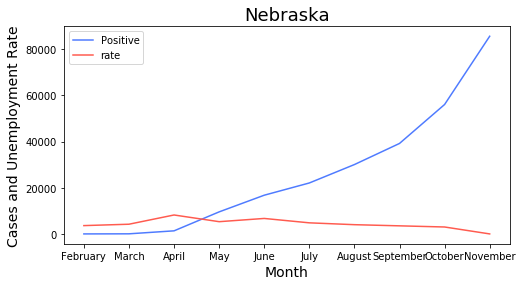

In [38]:
getFigure("Nebraska")

In [39]:
def highlight_style(feature): 
    """
    style_function for when choropleth button
    is highighted
    """
    return {'fillOpacity': 0.2,
         'weight': 1,
         'fillColor': '#000000',
         'color': '#000000'}

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


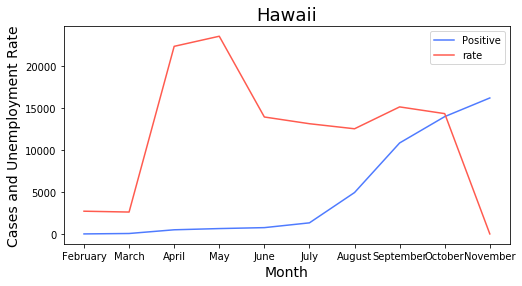

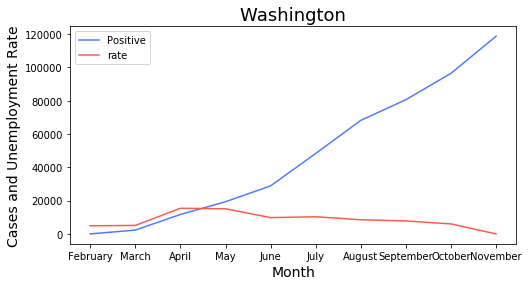

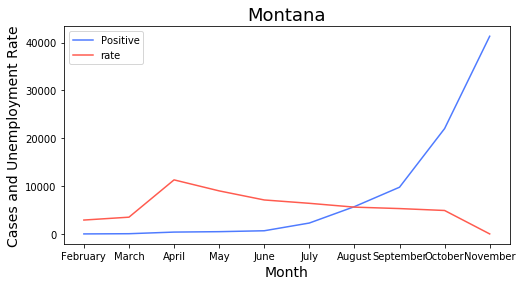

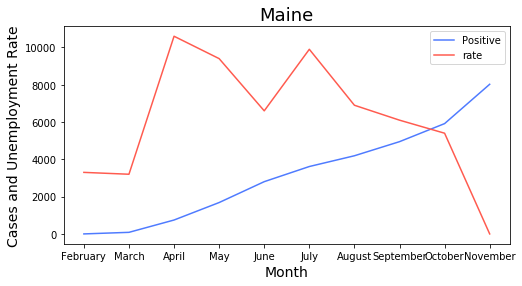

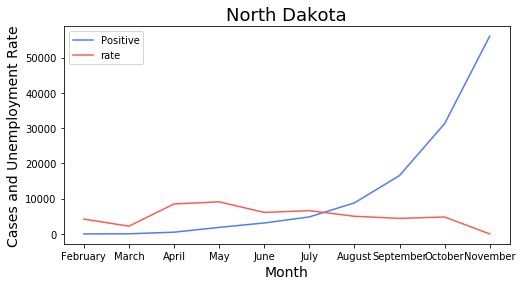

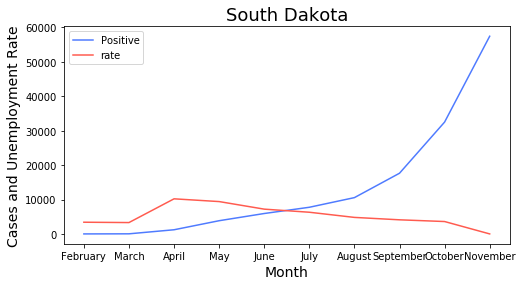

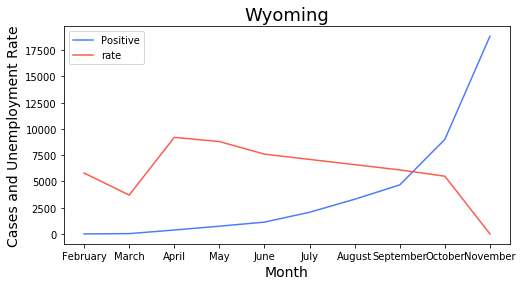

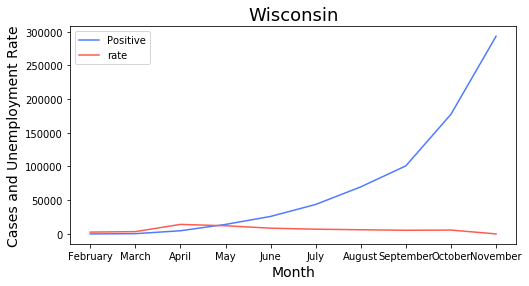

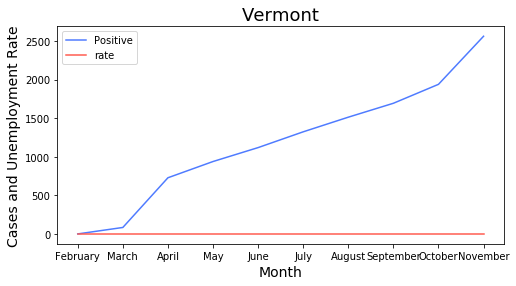

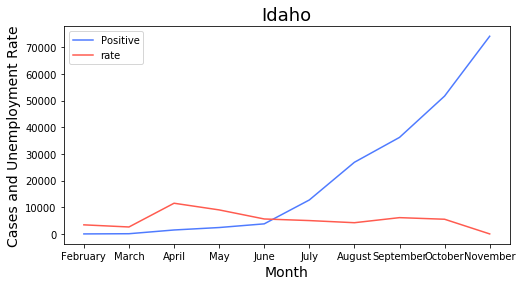

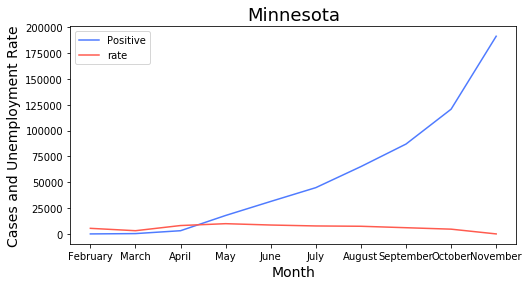

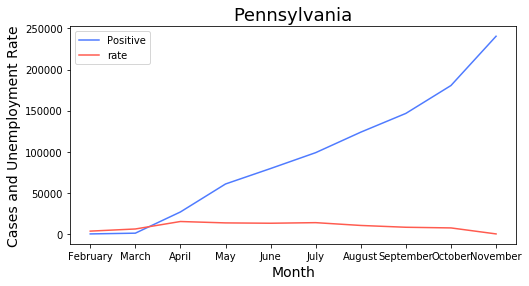

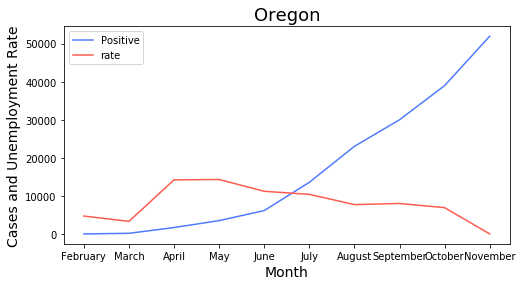

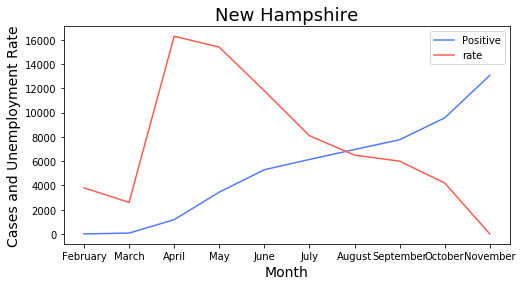

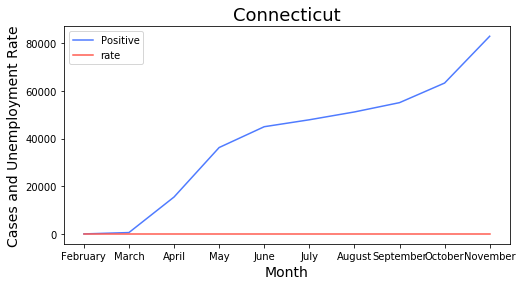

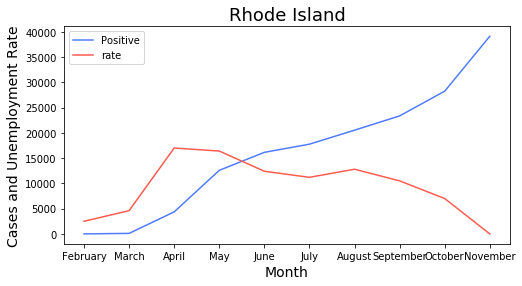

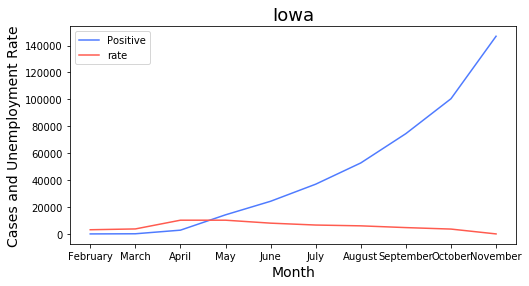

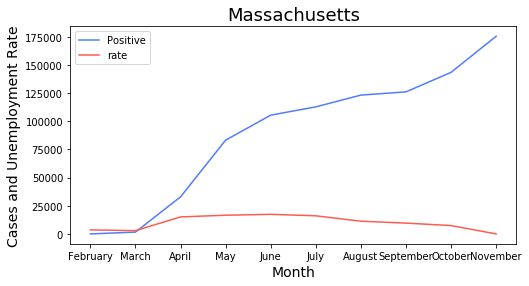

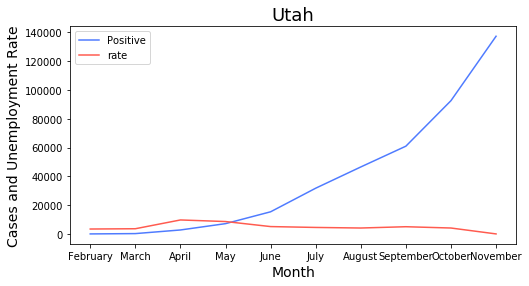

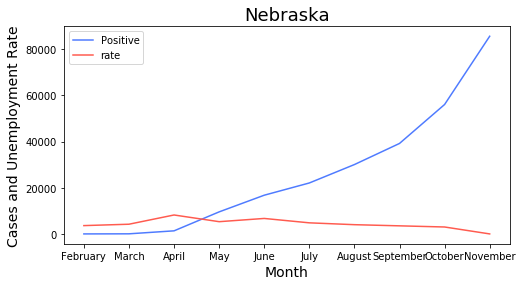

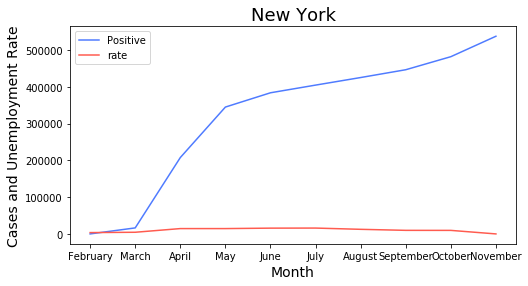

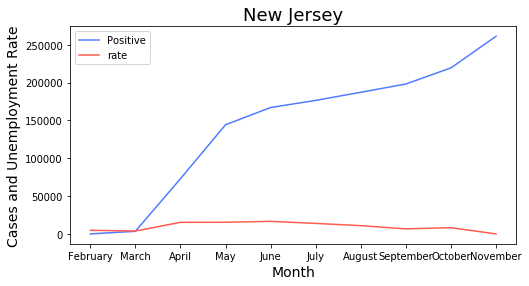

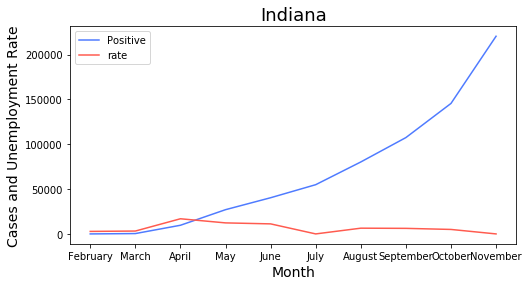

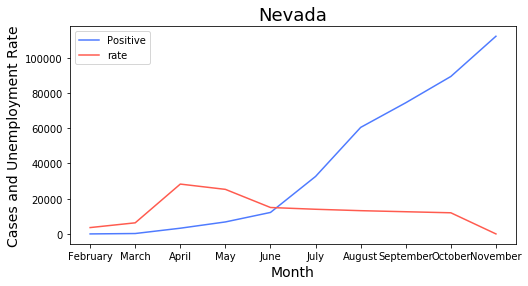

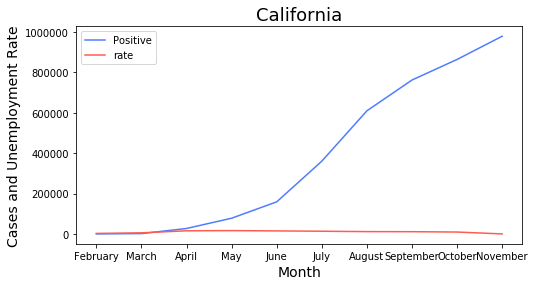

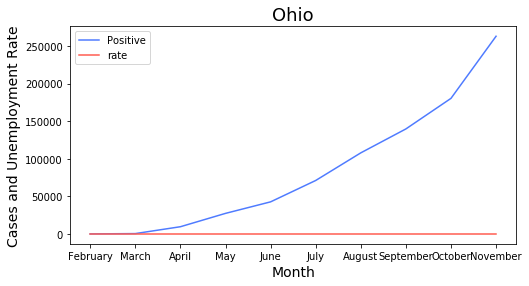

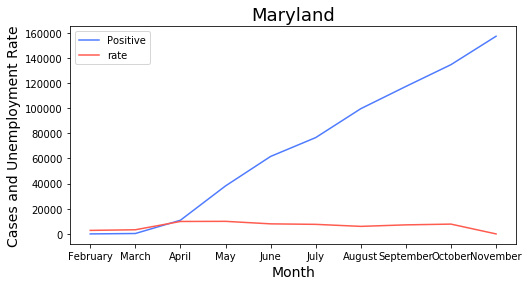

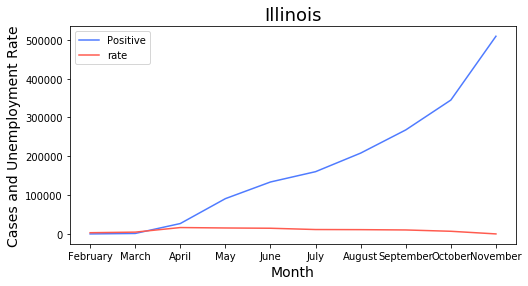

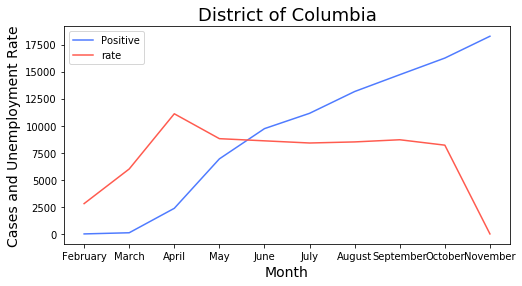

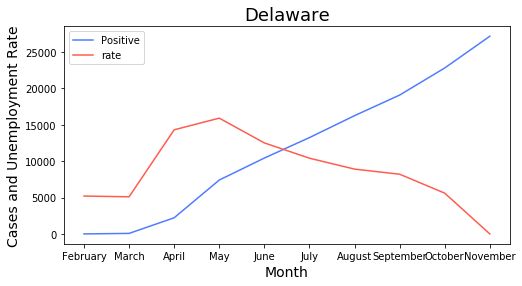

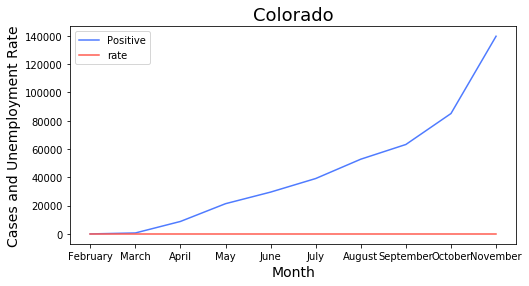

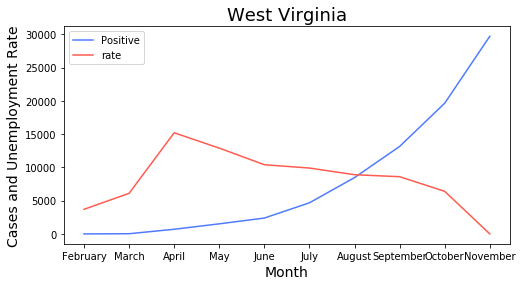

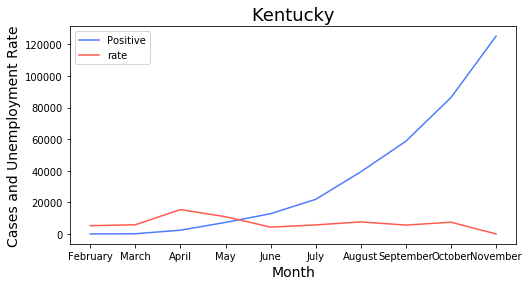

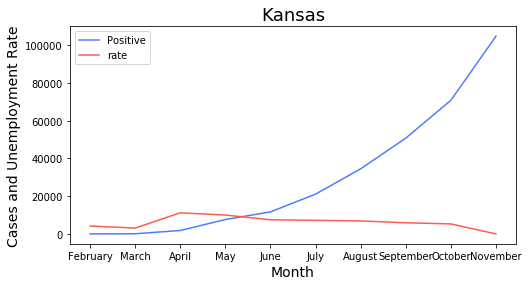

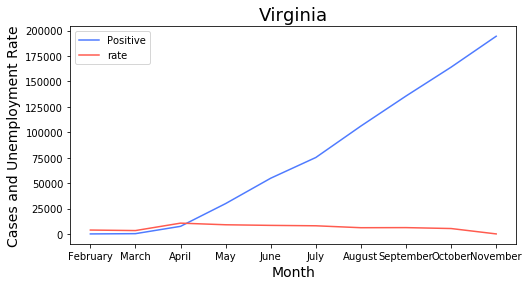

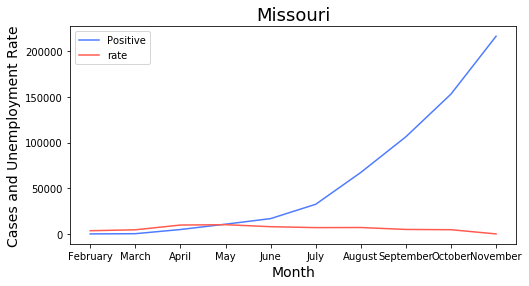

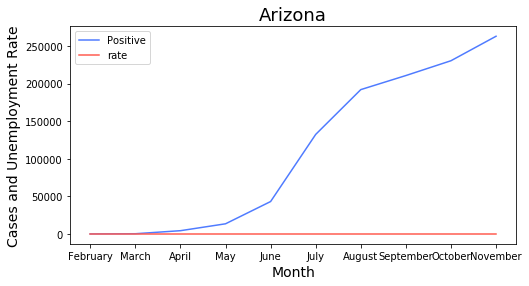

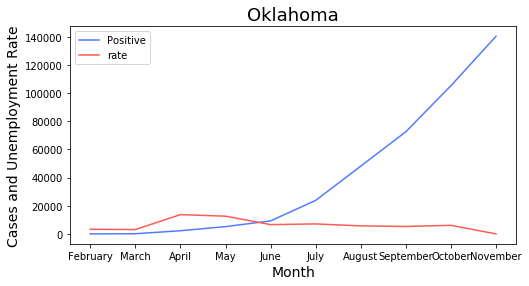

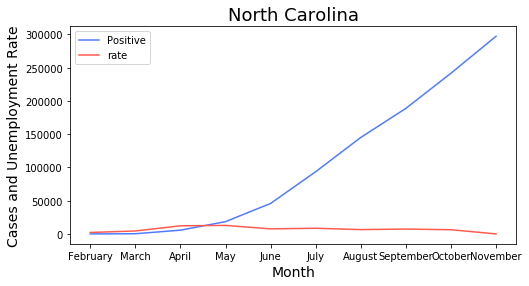

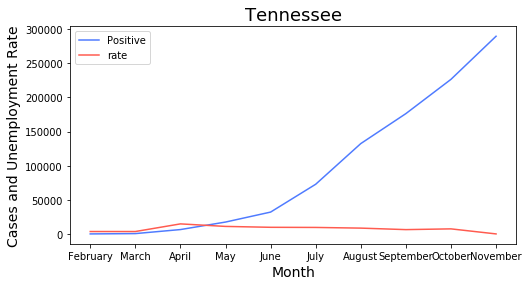

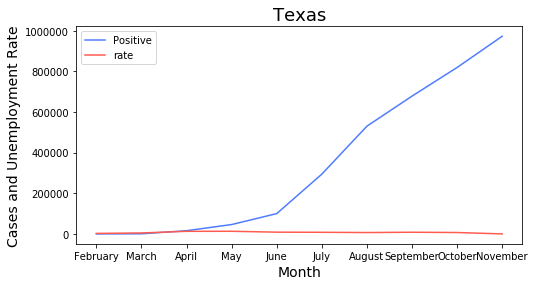

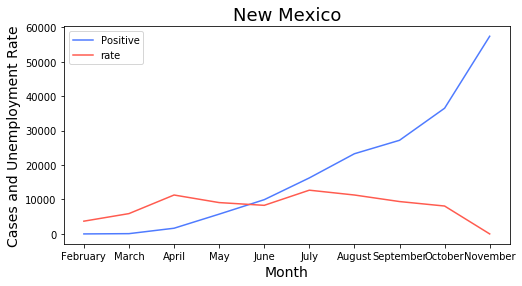

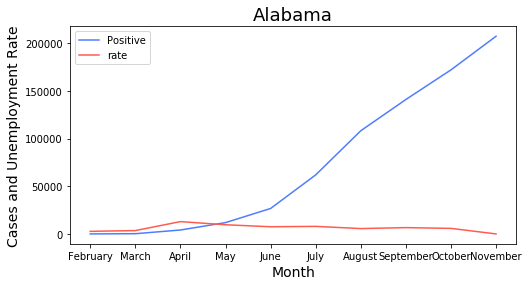

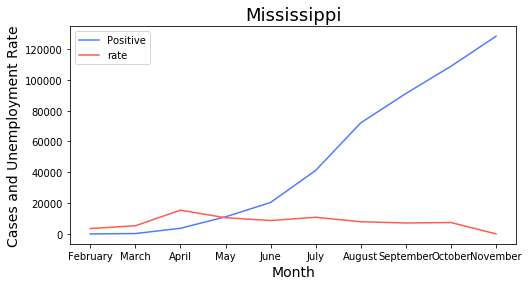

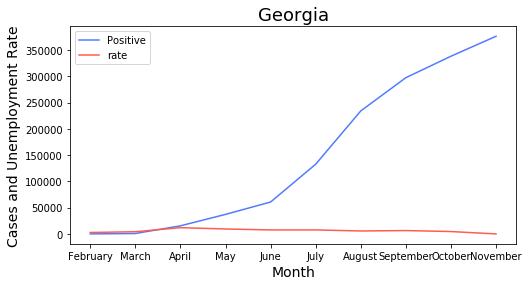

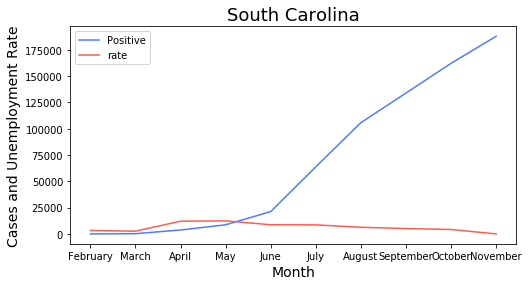

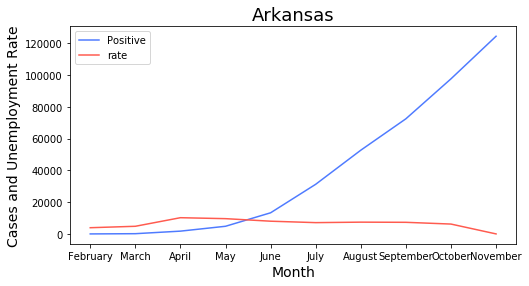

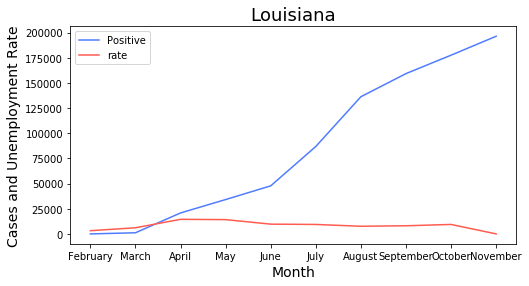

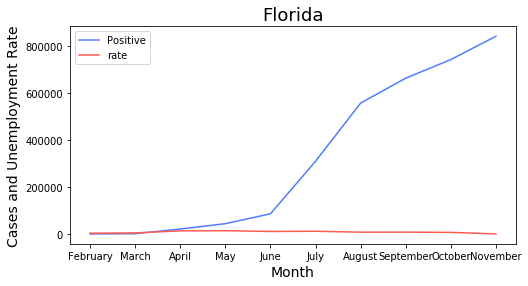

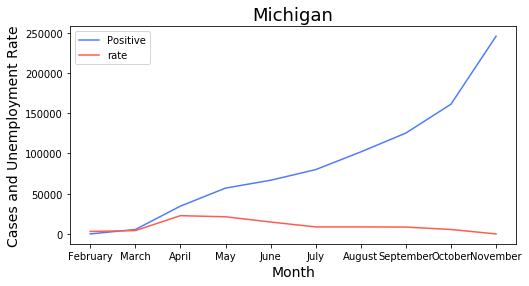

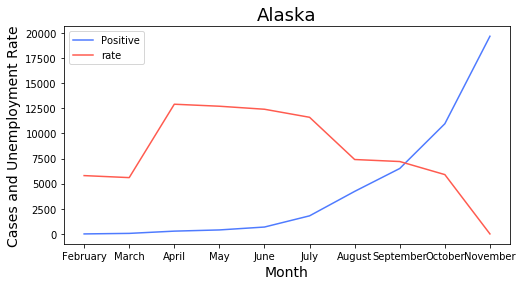

In [40]:
#plot choropleth button map
m = folium.Map(location=[50.77500, -100],zoom_start=3)
choropleth =folium.GeoJson(data= us_shape.to_json(),
                           style_function=style_function)
m.add_child(choropleth)

#Create popup button for each state
for i in range(len(us_shape)):
    
    geometry = us_shape.loc[i]['geometry']
    state_name = us_shape.loc[i]['state_name']
    popup = folium.Popup(getFigure(state_name),max_width=1000)
    
    state_marker = folium.GeoJson(data=mapping(geometry),
                                  highlight_function = highlight_style)
    state_marker.add_child(popup)
    m.add_child(state_marker)

m.save("us_election_map2.html")